In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = pd.read_csv("boston.csv")
boston.columns = boston.columns.str.upper() 
boston.rename(columns={"MEDV": "Price", 
                       "BLACK": "B"}, 
            inplace=True)

boston.drop(['ID'], axis=1, inplace=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
dataset=boston.copy()

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     333 non-null    float64
 1   ZN       333 non-null    float64
 2   INDUS    333 non-null    float64
 3   CHAS     333 non-null    int64  
 4   NOX      333 non-null    float64
 5   RM       333 non-null    float64
 6   AGE      333 non-null    float64
 7   DIS      333 non-null    float64
 8   RAD      333 non-null    int64  
 9   TAX      333 non-null    int64  
 10  PTRATIO  333 non-null    float64
 11  B        333 non-null    float64
 12  LSTAT    333 non-null    float64
 13  Price    333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.5 KB


In [46]:
## Summarizing The Stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [47]:
## Check the missing Values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [48]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
ZN,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
INDUS,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
CHAS,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
NOX,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
RM,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
AGE,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
DIS,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
RAD,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251
TAX,0.617081,-0.311180,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,-0.406477,0.544485,-0.448078


In [27]:
#!pip install seaborn

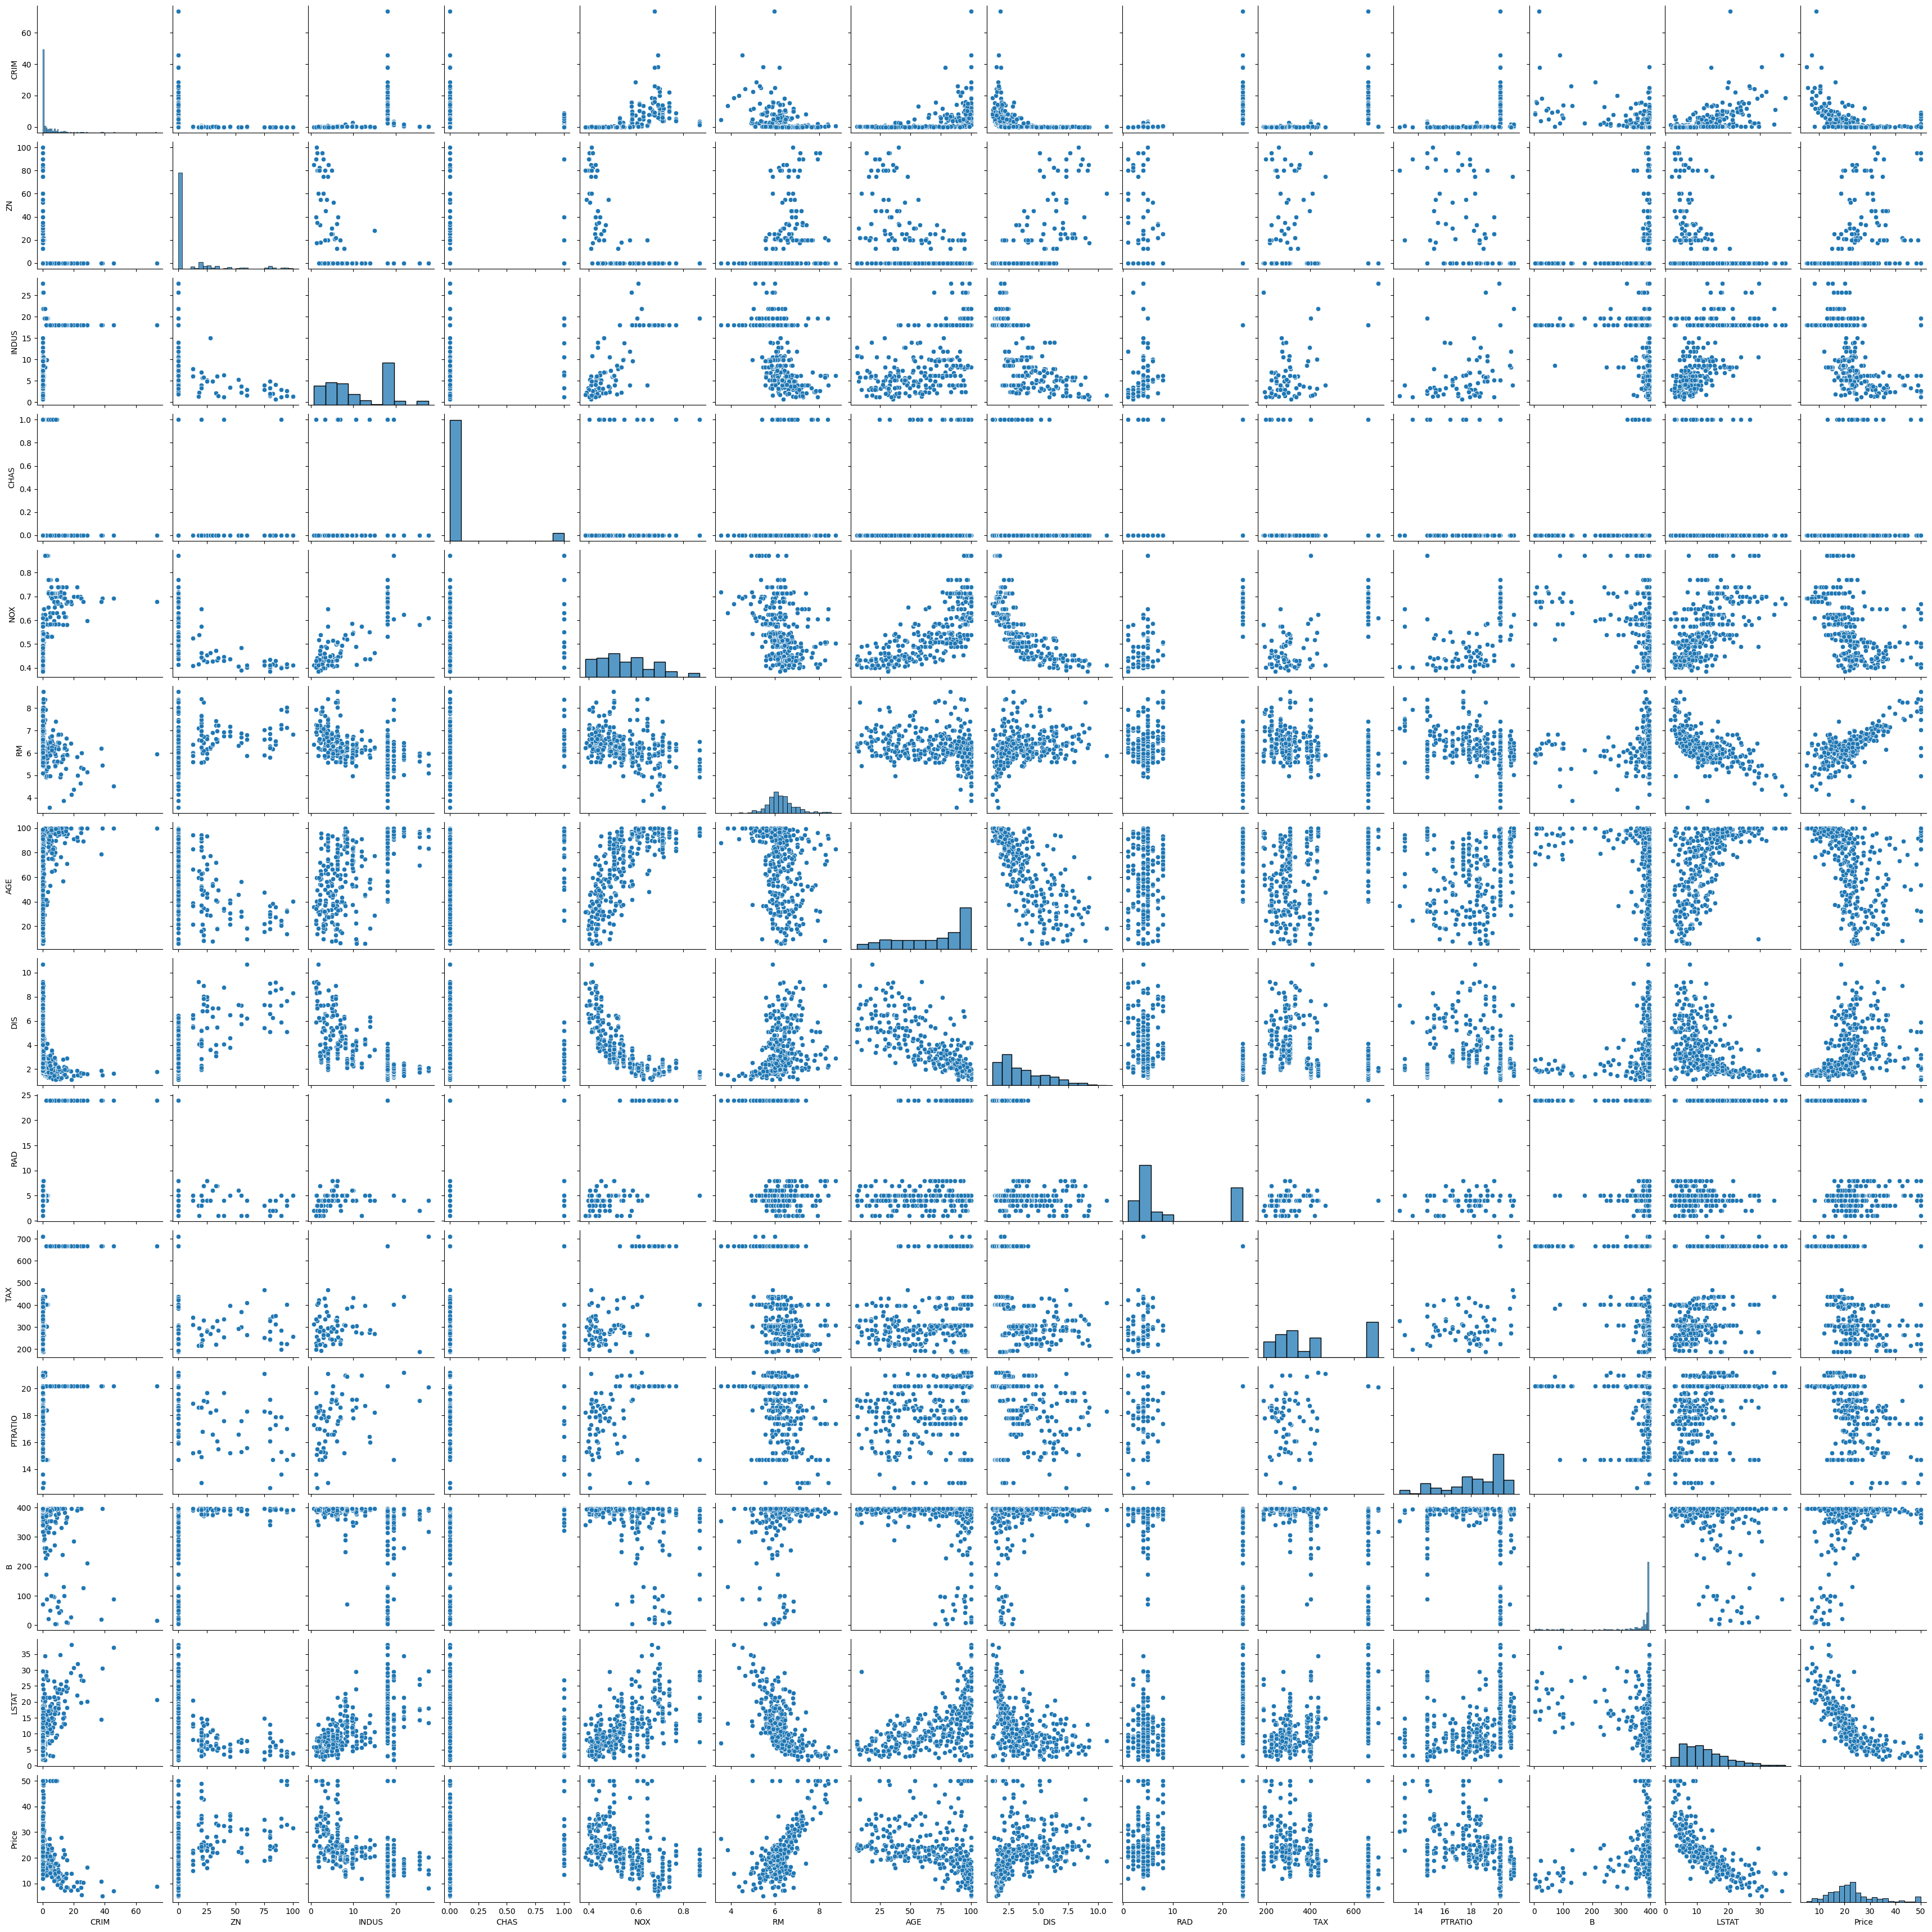

In [49]:
import seaborn as sns
sns.pairplot(dataset)

## Analyzing The Correlated Features

In [50]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
ZN,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
INDUS,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
CHAS,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
NOX,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
RM,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
AGE,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
DIS,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
RAD,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251
TAX,0.617081,-0.311180,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,-0.406477,0.544485,-0.448078


Text(0, 0.5, 'Price')

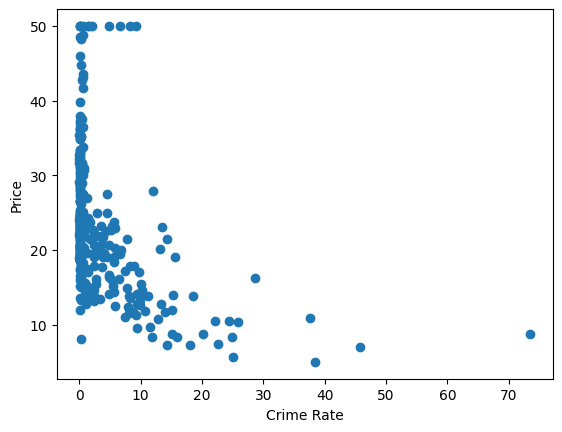

In [51]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

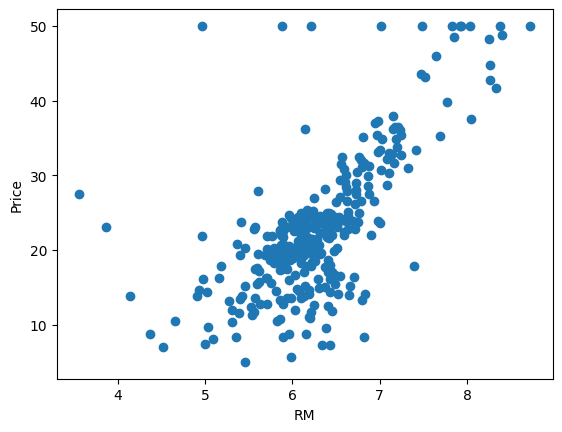

In [52]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<AxesSubplot: xlabel='RM', ylabel='Price'>

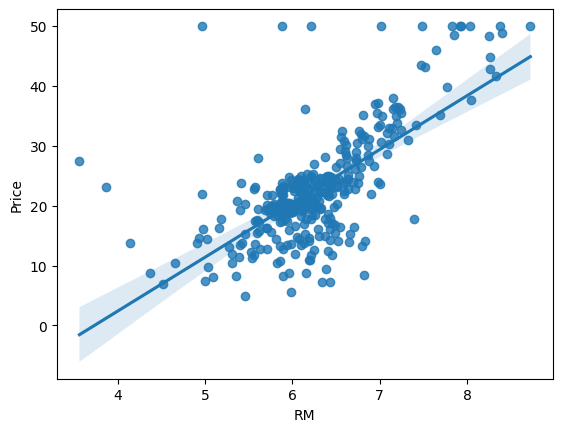

In [53]:
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)

<AxesSubplot: xlabel='LSTAT', ylabel='Price'>

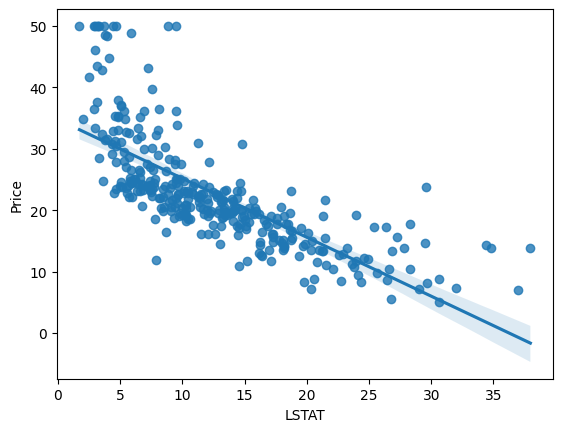

In [54]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

<AxesSubplot: xlabel='CHAS', ylabel='Price'>

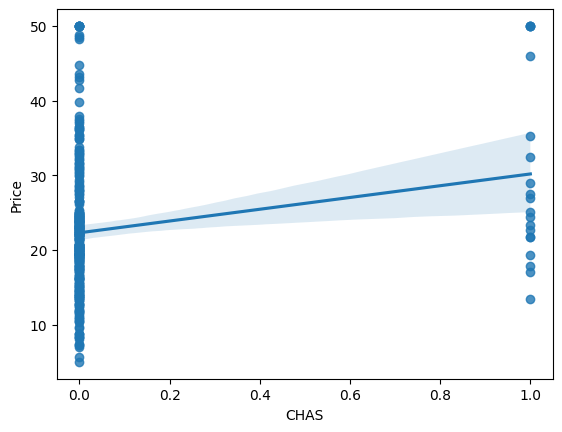

In [55]:
sns.regplot(x="CHAS",y="Price",data=dataset)

<AxesSubplot: xlabel='PTRATIO', ylabel='Price'>

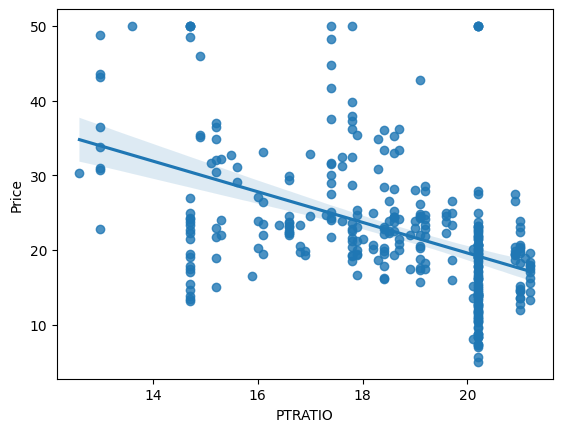

In [56]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

In [5]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [14]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [59]:
y

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: Price, Length: 333, dtype: float64

In [15]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
224,0.05497,0.0,5.19,0,0.5150,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
78,0.15098,0.0,10.01,0,0.5470,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
295,4.75237,0.0,18.10,0,0.7130,6.525,86.5,2.4358,24,666,20.2,50.92,18.13
17,0.95577,0.0,8.14,0,0.5380,6.047,88.8,4.4534,4,307,21.0,306.38,17.28
24,0.14150,0.0,6.91,0,0.4480,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01
71,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
106,1.34284,0.0,19.58,0,0.6050,6.066,100.0,1.7573,5,403,14.7,353.89,6.43
270,25.94060,0.0,18.10,0,0.6790,5.304,89.1,1.6475,24,666,20.2,127.36,26.64


In [63]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
25,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44
309,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87
73,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27
195,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70
57,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
77,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
311,8.05579,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666,20.2,352.58,18.14


In [17]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [64]:
X_train.iloc[0:1,:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
224,0.05497,0.0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.9,9.74


In [68]:
X_train=scaler.fit_transform(X_train)

In [69]:
X_test=scaler.transform(X_test)

In [70]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [71]:
X_train

array([[-0.43566892, -0.47770707, -0.852503  , ...,  0.80858773,
         0.42052006, -0.3762768 ],
       [-0.42239133, -0.47770707, -0.15916158, ..., -0.32145257,
         0.39152789, -0.29535425],
       [ 0.21395232, -0.47770707,  1.00455876, ...,  0.80858773,
        -3.77642989,  0.83611634],
       ...,
       [-0.2575645 , -0.47770707,  1.21745198, ..., -1.78108795,
        -0.10121766, -0.85458685],
       [ 3.14415287, -0.47770707,  1.00455876, ...,  0.80858773,
        -2.84916573,  2.06585003],
       [-0.21417344, -0.47770707,  1.21745198, ..., -1.78108795,
         0.12817225,  0.25376302]])

In [72]:
X_test.shape

(67, 13)

## Model Training

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
regression=LinearRegression()

In [75]:
regression.fit(X_train,y_train)

LinearRegression()

In [76]:
## print the coefficients and the intercept
print(regression.coef_)

[-0.53812411  1.45793683 -0.13602806  0.99787041 -1.80206039  2.29029274
 -0.29158493 -3.61966825  3.36219246 -2.45540107 -1.57407646  0.63887942
 -4.38424853]


In [77]:
print(regression.intercept_)

22.86842105263158


In [78]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [79]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [80]:
reg_pred

array([24.50141484, 23.35218616, 22.56081814, 33.27103664, 24.39179151,
       14.38881491, 17.58440531, 30.22482519, 16.3814254 , 25.75001663,
       25.95089381, 19.28314443, 20.40895745, 34.25669378, 21.96702176,
       34.11284465, 22.27120348, 16.98697062, 24.94339935, 16.91612324,
       35.99655208, 31.47377712, 23.19704537, 28.31771819, 15.95754574,
       41.80363869,  7.41212947,  1.23819578, 31.13731355, 10.43444587,
       19.36636029, 20.71859579, 27.04099002, 14.66393284, 19.12266966,
       12.29750678, 27.99251079,  4.41875062, 16.59733342, 22.59503327,
       23.5632186 , 21.51633999, 25.34424208, 39.23942244, 35.91224412,
       20.90286402, 10.94306131, 20.84527047, 13.75217322, 20.60415019,
       12.92310307, 28.70264392, 22.47376743, 12.8564295 , 33.7942933 ,
        0.94447788, 19.55892129, 26.68148037, 25.22660633, 28.78595944,
       18.10361954, 24.30249917, 18.18357009, 27.31291419, 22.9791363 ,
       17.13583443, 26.03089024])

## Assumptions

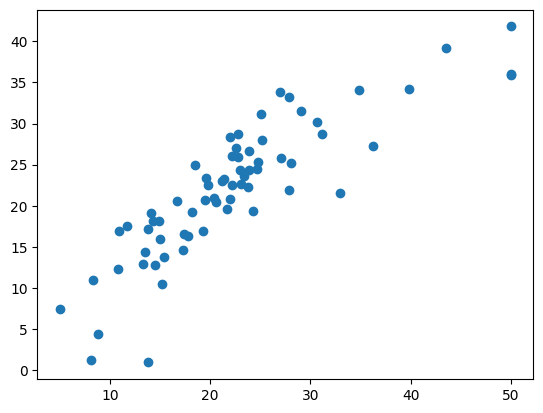

In [78]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [79]:
## Residuals
residuals=y_test-reg_pred

In [80]:
residuals

25     0.198585
309   -3.752186
73    -2.760818
195   -5.371037
57    -0.491792
         ...   
280   -3.883570
3      8.887086
77    -1.779136
311   -3.335834
60    -3.830890
Name: Price, Length: 67, dtype: float64

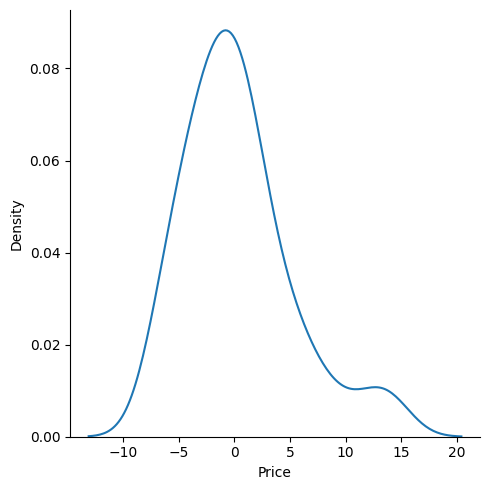

In [81]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

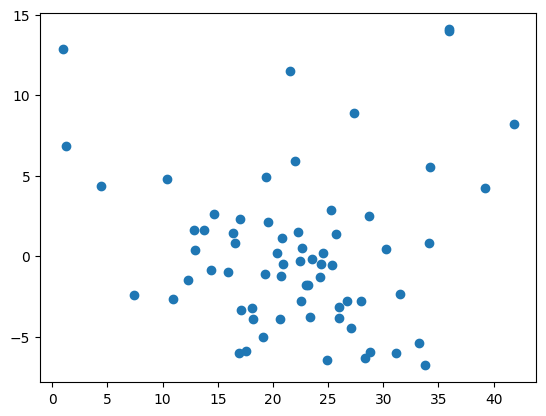

In [82]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.617505066454134
23.486735195425812
4.8463115041674545


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [84]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.739031586042544


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [85]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.675020465637885

## New Data Prediction

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [83]:
#boston.reshape(1,-1)
#boston.to_numpy()
#scaler.transform(boston.to_numpy().reshape(1,-1))
dataset.iloc[0:1,:-1]
scaler.transform(dataset.iloc[0:1,:-1])

array([[-0.44239691,  0.27270679, -1.26678168, -0.25298221, -0.16409229,
         0.43367523, -0.08682764,  0.17574504, -0.9831206 , -0.64585732,
        -1.49857787,  0.42052006, -1.06411844]])

In [84]:
regression.predict(scaler.transform(dataset.iloc[0:1,:-1]))

array([29.67537107])

## Pickling The Model file For Deployment

In [85]:
import pickle

In [86]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [87]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [88]:
## Prediction
pickled_model.predict(scaler.transform(dataset.iloc[0:1,:-1]))

array([29.67537107])